In [1]:
# Importing necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
# Define the directory path containing the images
data_directory = "/Users/ouzibigouziouzi/Desktop/FNNPK/train_data"
batch_size = 7
image_size = (50,50)
epoch_size = 200
fold_size = 3

In [3]:
# Create the KFold object
kfold = KFold(n_splits=fold_size, shuffle=True, random_state=42)

In [4]:
# Initialize lists to store the fold results
fold_train_loss = []
fold_train_accuracy = []
fold_val_loss = []
fold_val_accuracy = []

In [5]:
# Perform k-fold cross-validation
fold = 1
for train_index, val_index in kfold.split(os.listdir(data_directory)):
    print(f"Fold {fold}:")

    # Load and preprocess the data for training set
    train_data = tf.keras.preprocessing.image_dataset_from_directory(
        data_directory,
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset="training"
    )

    # Load and preprocess the data for validation set
    val_data = tf.keras.preprocessing.image_dataset_from_directory(
        data_directory,
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset="validation"
    )

    # Define data augmentation
    data_augmentation = tf.keras.Sequential([
      preprocessing.Rescaling(1./255),
      preprocessing.Resizing(image_size[0], image_size[1]),
      preprocessing.RandomFlip("horizontal"),
      preprocessing.RandomRotation(0.3), 
      #preprocessing.RandomZoom(0.1)
    ])

    # Define the model architecture
    model = Sequential([
        data_augmentation,
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        Dropout(0.25),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Dropout(0.25),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(4, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data, validation_data=val_data, epochs=epoch_size)

    # Store the fold results
    fold_train_loss.append(history.history['loss'])
    fold_train_accuracy.append(history.history['accuracy'])
    fold_val_loss.append(history.history['val_loss'])
    fold_val_accuracy.append(history.history['val_accuracy'])

    fold += 1

Fold 1:
Found 229 files belonging to 4 classes.


Using 184 files for training.
Found 229 files belonging to 4 classes.
Using 45 files for validation.
Epoch 1/200
27/27 [==============================] - 2s 37ms/step - loss: 1.3666 - accuracy: 0.2880 - val_loss: 1.3182 - val_accuracy: 0.4000
Epoch 2/200
27/27 [==============================] - 2s 42ms/step - loss: 1.2120 - accuracy: 0.4185 - val_loss: 1.0815 - val_accuracy: 0.5778
Epoch 3/200
27/27 [==============================] - 2s 40ms/step - loss: 1.0099 - accuracy: 0.5815 - val_loss: 1.2123 - val_accuracy: 0.3778
Epoch 4/200
27/27 [==============================] - 2s 48ms/step - loss: 1.0222 - accuracy: 0.5761 - val_loss: 1.0941 - val_accuracy: 0.5333
Epoch 5/200
27/27 [==============================] - 1s 35ms/step - loss: 0.9096 - accuracy: 0.5978 - val_loss: 0.8886 - val_accuracy: 0.6444
Epoch 6/200
27/27 [==============================] - 2s 50ms/step - loss: 0.8783 - accuracy: 0.6196 - val_loss: 0.9954 - val_accuracy: 0.6889
Epoch 7/200
27/27 [============================

7/7 [==============================] - 0s 3ms/step - loss: 1.7909 - accuracy: 0.6444
Validation Loss: 1.7909212112426758
Validation Accuracy: 0.644444465637207


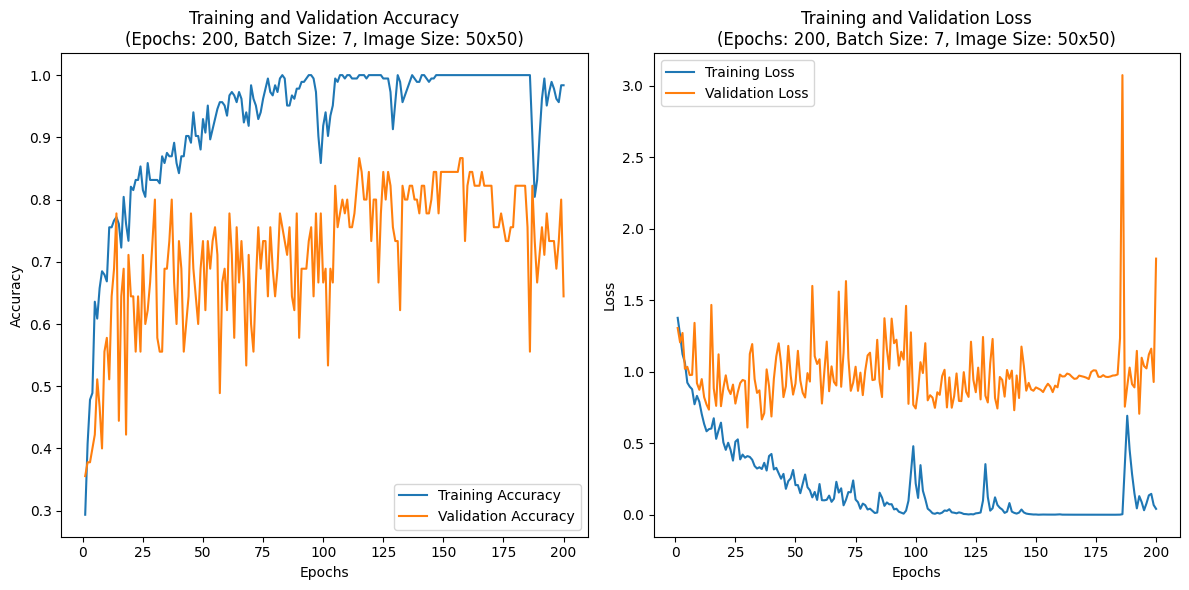

In [6]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(val_data)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Create line plots
epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title(f'Training and Validation Accuracy\n(Epochs: {epoch_size}, Batch Size: {batch_size}, Image Size: {image_size[0]}x{image_size[1]})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title(f'Training and Validation Loss\n(Epochs: {epoch_size}, Batch Size: {batch_size}, Image Size: {image_size[0]}x{image_size[1]})')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
# Save the model after the cross-validation
model.save('/Users/ouzibigouziouzi/Desktop/Data Science/Hydroponics/models/Modelv2_new.tf')
model.save('/Users/ouzibigouziouzi/Desktop/Data Science/Hydroponics/models/Modelv2_new.h5')

INFO:tensorflow:Assets written to: /Users/ouzibigouziouzi/Desktop/Data Science/Hydroponics/models/Modelv2_new.tf/assets


INFO:tensorflow:Assets written to: /Users/ouzibigouziouzi/Desktop/Data Science/Hydroponics/models/Modelv2_new.tf/assets
/Users/ouzibigouziouzi/.pyenv/versions/3.11.3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


GUI Gradio

In the following the gradio GUI is set up. It can be used by the link created below.

In [8]:
# in case gradio is not installed yet
%pip install gradio


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
#importing gradio
import gradio as gr

/Users/ouzibigouziouzi/.pyenv/versions/3.11.3/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The following function takes the input image and 
1) reshapes it according to the model input
2) calls the model to predict and stores the predictions
3) returns the predictions for all the classes

In [10]:
# function to predict with the model
def predict_input_image(img):
  img_4d=img.reshape(-1,50,50,3)
  prediction=model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(4)}

In [11]:
# getting the class names
class_names = train_data.class_names

In [12]:
#resizing the input image
image = gr.inputs.Image(shape=(50,50))

/var/folders/y2/t6bw962x70q2268c4_0wg5t80000gn/T/ipykernel_53518/2305234667.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(50,50))
/var/folders/y2/t6bw962x70q2268c4_0wg5t80000gn/T/ipykernel_53518/2305234667.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(50,50))


In [13]:
#creating the output labels
label = gr.outputs.Label(num_top_classes=4)

/var/folders/y2/t6bw962x70q2268c4_0wg5t80000gn/T/ipykernel_53518/1018824990.py:2: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=4)
/var/folders/y2/t6bw962x70q2268c4_0wg5t80000gn/T/ipykernel_53518/1018824990.py:2: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=4)


In [14]:
#from gradio.components import Image, Label
#image = Image(shape=(50, 50))
#label = Label(num_top_classes=4)

In [15]:
# creating the interface, GUI can be accessed by link posted
gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 [==============================] - 0s 72ms/step
Keyboard interruption in main thread... closing server.
